In [69]:
import math
import torch
import torch.nn.functional as F
import numpy as np
from torch import nn
from torch.autograd import Variable

In [76]:
def load_data(filename):
    data = []
    with open(filename) as f:
        for line in f.readlines():
            line = list(map(float, line.strip().split(" ")))
            data.append(line)
    data = np.matrix(data)
    X = data[:, 0:2]
    y = data[:, 2]
    return torch.tensor(X, dtype=torch.float), torch.tensor(y, dtype=torch.float)

X, y = load_data("data.txt")

31

In [91]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(2, 1) / math.sqrt(2))
        self.bias = nn.Parameter(torch.zeros(1))

    def forward(self, xb):
        return xb @ self.weights + self.bias

In [102]:
model = LinearRegression()
loss_func = F.mse_loss

In [120]:
print(loss_func(model(X), y))
n = X.size()[0]
lr = 1e-7
bs = 50

for epoch in range(2000):
    for i in range((n - 1) // bs + 1):
        start_i = i * bs
        end_i = start_i + bs
        xb = X[start_i:end_i]
        yb = y[start_i:end_i]
        pred = model(xb)
        loss = loss_func(pred, yb)
        loss.backward()
        with torch.no_grad():
            for p in model.parameters():
                p -= p.grad * lr
            model.zero_grad()
    if epoch%50 == 0:
        print(loss)

tensor(42.5886, grad_fn=<MseLossBackward>)
tensor(17.4417, grad_fn=<MseLossBackward>)
tensor(16.4542, grad_fn=<MseLossBackward>)
tensor(16.0689, grad_fn=<MseLossBackward>)
tensor(15.7309, grad_fn=<MseLossBackward>)
tensor(15.4338, grad_fn=<MseLossBackward>)
tensor(15.1723, grad_fn=<MseLossBackward>)
tensor(14.9418, grad_fn=<MseLossBackward>)
tensor(14.7385, grad_fn=<MseLossBackward>)
tensor(14.5590, grad_fn=<MseLossBackward>)
tensor(14.4004, grad_fn=<MseLossBackward>)
tensor(14.2600, grad_fn=<MseLossBackward>)
tensor(14.1358, grad_fn=<MseLossBackward>)
tensor(14.0257, grad_fn=<MseLossBackward>)
tensor(13.9282, grad_fn=<MseLossBackward>)
tensor(13.8417, grad_fn=<MseLossBackward>)
tensor(13.7649, grad_fn=<MseLossBackward>)
tensor(13.6968, grad_fn=<MseLossBackward>)
tensor(13.6362, grad_fn=<MseLossBackward>)
tensor(13.5825, grad_fn=<MseLossBackward>)
tensor(13.5347, grad_fn=<MseLossBackward>)
tensor(13.4922, grad_fn=<MseLossBackward>)
tensor(13.4544, grad_fn=<MseLossBackward>)
tensor(13.4

In [108]:
import matplotlib.pyplot as pp

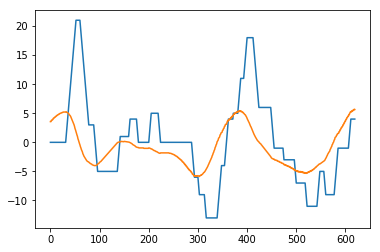

In [121]:
# pp.plot(X[:, 0])
# pp.plot(X[:, 1])
pp.plot(y)
y_pred = model(X)
pp.plot(y_pred.detach().numpy())